In [1]:
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from simple_tritium_transport_model import ureg, plot_integrated_top_release, plot_irradiation
from simple_tritium_transport_model import plot_salt_inventory, plot_top_release

ureg.mpl_formatter = "{:~P}"

COLLECTION_VOLUME = 10 * ureg.ml
LSC_SAMPLE_VOLUME = 10 * ureg.ml

In [2]:
import baby_run_3
model_run_3 = baby_run_3.baby_model
model_run_3.run(6 * ureg.days)

/home/remidm/miniconda3/envs/baby-paper-env/lib/python3.9/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [3]:
import baby_run_4
model_run_4 = baby_run_4.baby_model
model_run_4.run(6 * ureg.day)

In [4]:
import baby_run_5
model_run_5 = baby_run_5.baby_model

model_run_5.run(7 * ureg.day)

In [5]:
import baby_run_6
model_run_6 = baby_run_6.baby_model

model_run_6.run(7 * ureg.day)

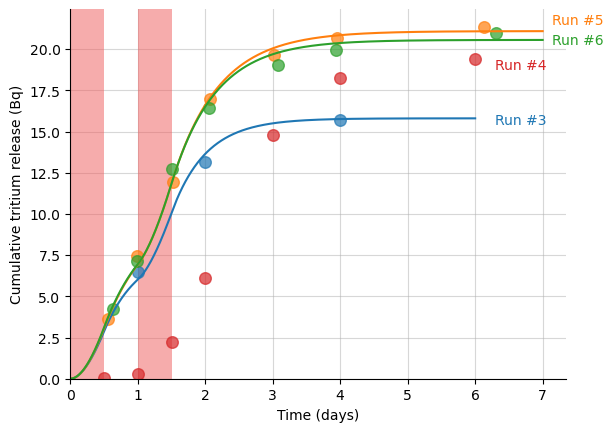

In [6]:
plt.figure()

plot_irradiation(model_run_3, facecolor="#EF5B5B", alpha=0.5)

color_run_3 = "tab:blue"
color_run_4 = "tab:red"
color_run_5 = "tab:orange"
color_run_6 = "tab:green"

plot_integrated_top_release(model_run_3, color=color_run_3, label="Run #3")

plt.scatter(
    baby_run_3.replacement_times,
    baby_run_3.cumulative_release,
    s=70,
    color=color_run_3,
    alpha=0.7,
)

plot_integrated_top_release(model_run_5, color=color_run_5, label="Run #5")

plt.scatter(
    baby_run_5.replacement_times,
    baby_run_5.cumulative_release,
    s=70,
    color=color_run_5,
    alpha=0.7,
)

plot_integrated_top_release(
    model_run_6, color=color_run_6, label="Run #6"
)

plt.scatter(
    baby_run_6.replacement_times,
    baby_run_6.cumulative_release,
    s=70,
    color=color_run_6,
    alpha=0.7,
)

plt.scatter(
    baby_run_4.replacement_times,
    baby_run_4.cumulative_release,
    s=70,
    color=color_run_4,
    alpha=0.7,
)

# plt.annotate("Run #4", (6 * ureg.days, 18 * ureg.Bq), color=color_run_4)

plt.xlim(left=0 * ureg.day)
plt.ylim(bottom=0)
plt.gca().spines[["right", "top"]].set_visible(False)
plt.grid(alpha=0.5)
# plt.legend(reverse=True)
plt.annotate(
    f"Run #3",
    (baby_run_3.baby_model.times[-1] * 1.05, baby_run_3.cumulative_release[-1]),
    color=color_run_3,
    va="center",
)
plt.annotate(
    f"Run #4",
    (baby_run_4.baby_model.times[-1] * 1.05, baby_run_4.cumulative_release[-1] * 0.98),
    color=color_run_4,
    va="center",
)
plt.annotate(
    f"Run #5",
    (baby_run_5.baby_model.times[-1] * 1.02, baby_run_5.cumulative_release[-1] * 1.02),
    color=color_run_5,
    va="center",
)
plt.annotate(
    f"Run #6",
    (baby_run_6.baby_model.times[-1] * 1.02, baby_run_6.cumulative_release[-1] * 0.98),
    color=color_run_6,
    va="center",
)
# labelLines(plt.gca().get_lines(), zorder=2.5)
# plt.gcf().text(0.08, 0.97, "Cumulative tritium release", weight="bold", fontsize=15)
plt.xlabel("Time (days)")
plt.ylabel("Cumulative tritium release (Bq)")
plt.gca().set_axisbelow(True)
plt.savefig("cumulative_release_compare_runs.pdf")

In [7]:
print(model_run_3.k_top)
print(model_run_5.k_top)

print(model_run_3.neutron_rate * model_run_3.TBR)
print(model_run_5.neutron_rate * model_run_5.TBR)

1.47e-06 meter / second
9.113999999999999e-07 meter / second
143035.2 particle / second
182512.5 particle / second


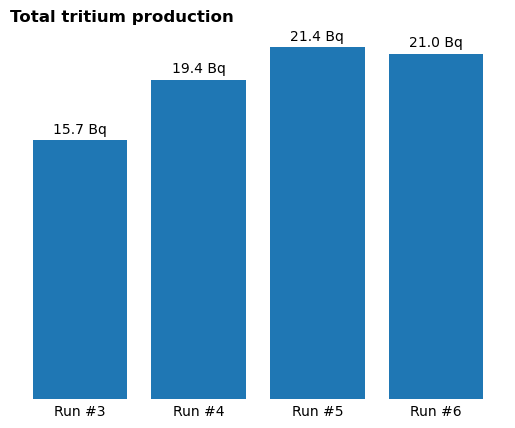

In [8]:
# bar chart for each run the last tritium release
fig, ax = plt.subplots()
bars = ax.bar(
    ["Run #3", "Run #4", "Run #5", "Run #6"],
    [
        baby_run_3.cumulative_release[-1],
        baby_run_4.cumulative_release[-1],
        baby_run_5.cumulative_release[-1],
        baby_run_6.cumulative_release[-1],
    ],
)
# x labels but no ticks
ax.tick_params(axis="both", which="both", length=0)
ax.yaxis.set_visible(False)
ax.spines[["right", "top", "left", "bottom"]].set_visible(False)
ax.set_axisbelow(True)
ax.bar_label(bars, fmt="%.1f Bq", padding=3)
plt.title("Total tritium production", loc="left", weight="bold")
plt.savefig("total_tritium_production.pdf")
plt.savefig("total_tritium_production.svg")

In [9]:
# read from csv file

filename = "../neutron_detection/activation_foils/neutron_rates.csv"

import pandas as pd

from pathlib import Path

filename = Path(filename)

if not filename.exists():
    raise FileNotFoundError(f"{filename} not found. Run the neutron activation foil analysis notebook first.")

df = pd.read_csv(filename)
df

,run,generator,flux_mean [s^-1],flux_min [s^-1],flux_max [s^-1]
0,4,A325,1.023257e+08,9.842884e+07,1.062226e+08
1,4,P383,2.643381e+08,2.612148e+08,2.674615e+08
2,5,A325,1.164223e+08,1.154408e+08,1.174039e+08
3,5,P383,2.710494e+08,2.679319e+08,2.741670e+08
4,6,A325,1.063971e+08,1.059949e+08,1.067994e+08
5,6,P383,2.476979e+08,2.462575e+08,2.491382e+08


In [10]:
# sum all the rows with the same value for the "run" column

df = df.groupby("run").sum()
df

,generator,flux_mean [s^-1],flux_min [s^-1],flux_max [s^-1]
run,,,,
4,A325P383,3.666638e+08,3.596436e+08,3.736841e+08
5,A325P383,3.874718e+08,3.833727e+08,3.915708e+08
6,A325P383,3.540950e+08,3.522524e+08,3.559375e+08


In [11]:
import numpy as np
from simple_tritium_transport_model import activity_to_quantity

total_irradiation_time = sum([irr[1] - irr[0] for irr in model_run_6.irradiations])

# convert to numpy array
fluxes = df["flux_mean [s^-1]"].values * ureg.neutron / ureg.s

total_neutron_fluence = fluxes * total_irradiation_time
total_neutron_fluence = total_neutron_fluence.to(ureg.neutron)

tritium_production = [
        baby_run_4.cumulative_release[-1],
        baby_run_5.cumulative_release[-1],
        baby_run_6.cumulative_release[-1],
    ]
tritium_production = ureg.Quantity.from_list(tritium_production)
tritium_production = activity_to_quantity(tritium_production).to(ureg.particle)

TBR = tritium_production / total_neutron_fluence

TBR = TBR.to(ureg.particle * ureg.neutron**-1)

for i, row in enumerate(df.iterrows()):
    print(f"Run {row[0]}: {TBR[i]:.2e~P}")
    print(f"T production {tritium_production[i]:.2e~P}")
    print(f"Neutron fluence {total_neutron_fluence[i]:.2e~P} \n")

Run 4: 3.42×10⁻⁴ particle/n
T production 1.08×10¹⁰ particle
Neutron fluence 3.17×10¹³ n 

Run 5: 3.57×10⁻⁴ particle/n
T production 1.19×10¹⁰ particle
Neutron fluence 3.35×10¹³ n 

Run 6: 3.83×10⁻⁴ particle/n
T production 1.17×10¹⁰ particle
Neutron fluence 3.06×10¹³ n 



In [12]:
# print stdev of TBRs
stdev = np.std(TBR)
print(f"Standard deviation of TBRs: {stdev:.2e~P}")

# in percent
stdev = (stdev / np.mean(TBR)).to(ureg.dimensionless).magnitude
print(f"Standard deviation of TBRs: {stdev:.2%}")

Standard deviation of TBRs: 1.68×10⁻⁵ particle/n
Standard deviation of TBRs: 4.67%
